# Chapter 07 딥러닝

### 07-1 인공 신경망

패션 MNIST

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

# 각 데이터는 28 x 28크기로 이루어져있다.

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


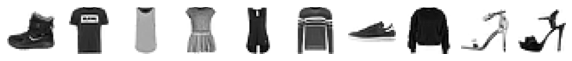

In [3]:
# 10개의 샘플 그림으로 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [4]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
from pandas import DataFrame as df
col = list(range(10))
ind = ['패션 아이템']
data = [['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']]
df(data, columns=col, index=ind)

,0,1,2,3,4,5,6,7,8,9
패션 아이템,티셔츠,바지,스웨터,드레스,코트,샌달,셔츠,스니커즈,가방,앵클 부츠


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

# 각 레이블마다 6000개가 있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


로지스틱 회귀로 패션 아이템 분류하기

- 훈련 데이터가 많기 때문에 한꺼번에 모델을 훈련하는 것보다 SGDClassifier 클래스 사용

- loss 매개변수에 'log'로 지정하여 로지스틱 손실함수를 최소화하는 확률적 경사 하강법 모델을 만들자!

In [7]:
# 정규화
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


**인공 신경망**

- 텐서플로 : 인기가 가장 높은 딥러닝 라이브러리
 
 - 케라스 : 텐서플로의 고수준 API

In [9]:
import tensorflow as tf
from tensorflow import keras

인공 신경망에서는 교차검증을 잘 사용하지 않고 검증세트를 별도로 덜어내어 사용한다.

1. 딥러닝 분야에서는 데이터셋이 충분이 크기 때문

2. 교차검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문

In [10]:
# 검증세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
        train_scaled, train_target, test_size=0.2, random_state=42)

In [11]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [12]:
# 밀집층 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))    # 10: 뉴런의 개수
#  activation: 뉴런의 출력에 적용할 함수(활성화 함수), input_shape: 입력층의 크기
# 이진 분류의 경우는 activation='sigmoid'로 설정

In [13]:
model = keras.Sequential(dense)  # 위 'dense'밀집층을 가진 신경망 모델 생성
# Sequential() 객체를 생성할 때, 모델에 추가할 층을 지정할 수 있다

In [14]:
# 케라스 모델의 훈련하기 전 설정 단계 : compile()메서드에서 수행
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 손실함수의 종류를 지정해주어야 함 (loss에), metrics: 훈련 과정에서 계산할 측정값 (정확도도 함께 출력)

- 이진 분류 : loss = 'binary_crossentropy' ( 이진 크로스 엔트로피 손실 함수 사용 )

- 다중 분류 : loss = 'categorical_crossentropy' ( 크로스 엔트로피 손실 함수 사용 )

In [15]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


'sparse_categorical_crossentropy'를 사용하는 이유는 

타깃값이 원-핫 인코딩으로 안되있기 때문에 sparse가 붙어서 loss 매개변수에 들어가면 원-핫 인코딩으로 자동으로 바꾸어 크로스 엔트로피 손실함수에 적용시킨다!

타깃값이 원-핫 인코딩으로 준비되었다면, loss='categorical_crossentropy'로 지정

In [16]:
model.fit(train_scaled, train_target, epochs=5)  # 5번 반복

# fit()메서드에서 batch_size의 기본값 == 32 , --> 변경가능
print(32 * 1500)   # train_scaled의 크기(48000)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6039 - accuracy: 0.7950
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4797 - accuracy: 0.8403
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8484
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4455 - accuracy: 0.8530
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4364 - accuracy: 0.8554
48000


In [17]:
model.evaluate(val_scaled, val_target)  # evaluate(): 모델의 성능을 평가하는 메서드

375/375 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8447


[0.4519186317920685, 0.8446666598320007]

###07-2 심층 신경망

2개의 층

In [18]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [19]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
        train_scaled, train_target, test_size=0.2, random_state=42)

- 입력층

- 은닉층 : 출력층에 비해 활성화 함수가 비교적 자유롭다.

- 출력층 : 이진 분류일 경우 시그모이드, 다중 분류일 경우 소프트맥스 함수로 활성화함수가 제한적

분류문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수 사용, but 회귀에서는 사용 X  --> 활성화함수가 항등함수와 같음

- 모든 은닉층에서 활성화 함수를 사용하는 이유 :

 선형을 여러 층 쌓아도 쓸모없기 때문에 비선형적으로 비틀어주기 위함

In [20]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))  # 은닉층의 뉴런 개수는 사람이 판단 (적어도 출력층보다는 많게)
dense2 = keras.layers.Dense(10, activation='softmax')   # 은닉층 --> 출력층 사이의 밀집층

In [21]:
# 심층 신경망 만들기
model = keras.Sequential([dense1, dense2])  # 가장 처음 등장하는 은닉층부터 마지막 출력층 순으로 나열

In [22]:
model.summary()   # 층에 대한 유용한 정보를 얻을 수 있음

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 층을 추가하는 다른 방법
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),  # 위의 dense1
                          keras.layers.Dense(10, activation='softmax', name='output')],                      #      dense2
                          name='패션 MNIST 모델')
# Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체 만들기

model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Sequential 클래스에서 층을 추가할 때 가장 널리 사용하는 방법 : add() 메서드 사용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))  # dense1 추가
model.add(keras.layers.Dense(10, activation='softmax'))      # dense2 추가

model.summary()  # 같다

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)     # 생성한 모델 훈련

# 인공 신경망에 몇 개의 층을 추가하더라도 compile(), fit()메서드의 사용법은 동일! --> 케라스 API의 장점

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5634 - accuracy: 0.8086
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8543
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3729 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3511 - accuracy: 0.8743
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8796


- **렐루 함수 (ReLU)** :

 입력이 양수일 경우 그냥 입력을 통과시키고, 음수일 경우에는 0으로 만든다.

 특히 이미지 분류 문제에서 높은 성능을 냄

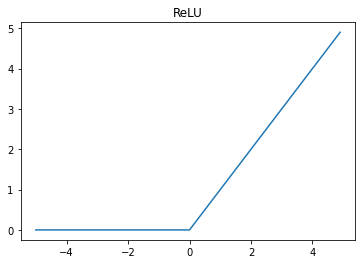

In [26]:
# ReLU 함수 그리기
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-5, 5, 0.1)
y = np.maximum(x,0)
plt.plot(x,y)
plt.title('ReLU')
plt.show()

In [27]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))    # Flatten()층을 추가하면 reshape()로 1차원으로 전처리하지 않아도 된다
#                                                         입력 차원을 모두 일렬로 펼치는 역할, 학습하는 층은 아님.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
# reshape()로 전처리하는 대신, add() 할 때 Flatten()층을 추가했음
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [29]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5354 - accuracy: 0.8122
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3957 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3547 - accuracy: 0.8704
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3315 - accuracy: 0.8815
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8864


In [30]:
model.evaluate(val_scaled, val_target)

# 은닉층을 추가하니 성능이 조금 향상되었다!

375/375 [==============================] - 1s 1ms/step - loss: 0.3680 - accuracy: 0.8792


[0.3680174648761749, 0.8791666626930237]

신경망의 하이퍼파라미터 ( 지정해 주어야 하는 매개변수 ) :

은닉층의 뉴런개수, 활성화 함수종류, 층의 종류, 미니배치 개수 등등...

케라스는 다양한 종류의 경사 하강법을 제공하는데, 이들을 **'옵티마이저'**라고 부른다.

In [31]:
model.compile(optimizer='sgd', loss='sparse_categorical_entropy', metrics='accuracy')
# 기본 optimizer= 'rmsprop'

In [32]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_entropy', metrics='accuracy')
# 바로 위 코드와 정확히 동일한 코드

# 여기서 sgd는 기본적으로 미니배치를 사용한다

In [33]:
sgd = keras.optimizers.SGD(learning_rate=0.1)   # 학습률을 따로 지정

**모멘텀** : 운동량을 의미하며 Momentum Optimizer는 매개변수의 이동에 속도를 부여하는 것을 의미한다.

예를 들어 구슬을 떨어트리면 급한 경사에서는 더 빨라지듯이 매개변수의 변화에도 속도를 부여하는 것처럼 생각 ( 관성 )

- 모멘텀 최적화 : 마치 이전의 그레이디언트를 가속도처럼 사용

- 네스테로프 모멘텀 최적화 : 모멘텀 최적화를 2번 반복하여 구현

- 적응적 학습률 : 모델이 최적점에 가까이 갈수록 학습률을 낮추는 방법

 - 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad과 RMSprop이 있다.

In [34]:
sgd  = keras.optimizers.SGD(momentum=0.9, nesterov=True)  # momentum=0.9가 국룰

In [35]:
# Adagrad
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
# RMSprop
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [37]:
# Adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 것
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')

적응적 학습률을 사용하는 위 3개의 클래스는 learning_rate가 기본적으로 0.001이다.

In [38]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
# Adam으로 패션 MNIST 모델 훈련하기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# 기본 RMSprop을 사용했을 때와 거의 같은 성능

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5252 - accuracy: 0.8163
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8608
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3483 - accuracy: 0.8739
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3234 - accuracy: 0.8825
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.8891


In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3663 - accuracy: 0.8670


[0.36625394225120544, 0.8669999837875366]

### 07-3 신경망 모델 훈련

fit( ) 메서드는 History( )클래스 객체를 반환한다.

History객체에는 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다 --> 이 값으로 그래프 그리기 가능

In [41]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [42]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:        # 더 추가하려는 층이 있다면:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [43]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)  # fit()메서드의 반환값을 history에 저장
# verbose : 훈련 과정 출력을 조절
#           기본값은 1로, 훈련과정을 진행막대와 손실등의 지표가 모두 출력, 0이면 출력x, 2이면 진행막대 빼고 출력

In [45]:
print(history.history.keys())
print(history.history['loss'])

dict_keys(['loss', 'accuracy'])
[0.5304573774337769, 0.39075231552124023, 0.3544592559337616, 0.3315703272819519, 0.3196038007736206]


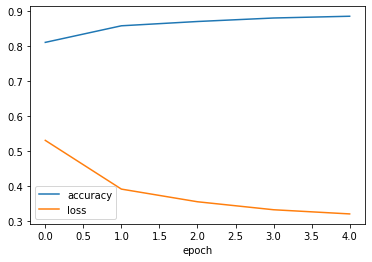

In [46]:
# 에포크당 loss, accuracy 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 에포그마다 손실이 감소하고, 성능이 향상된다!

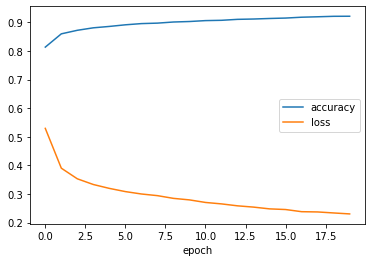

In [47]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)   # 에포크를 20으로 늘려서 훈련
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 에포크를 늘리니까 더 향상되는것 같지만 과대적합일 우려가 있으니 검증세트의 평가를 보자

In [48]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

# 검증 손실을 계산하려면 validation_data에 검증세트의 입력과 타깃값을 전달해준다

In [49]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


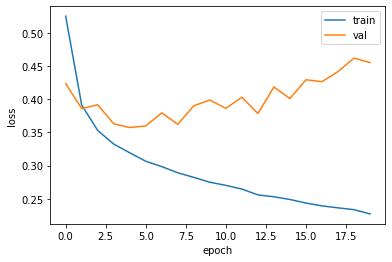

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 5번째 에포크에서 val_loss가 증가하기 시작 --> 과대적합

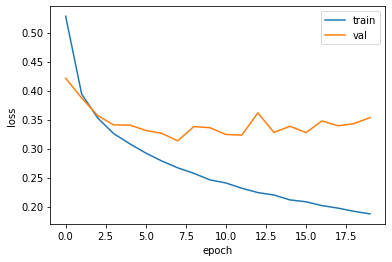

In [51]:
# RMSprop 대신 Adam으로 훈련
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# RMSprop보다는 Adam이 이 데이터셋에 잘 맞는다!

**드롭 아웃** :

훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런출력을 0으로 만들어) 과대적합을 막는다.

- 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 하이퍼파라미터이다.

- 훈련이 끝나고 평가난 예측을 할때는 드롭아웃을 적용하면 안된다. --> 케라스에서 자동으로 적용하지 않는다. (따로 뺄 필요 X)

In [52]:
model = model_fn(keras.layers.Dropout(0.3))  # 30% 정도를 드롭아웃 하겠다
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


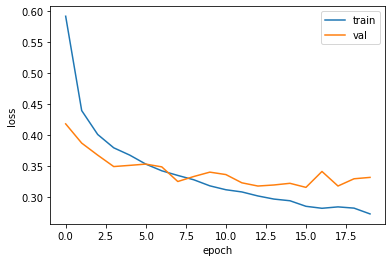

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

모델 저장과 복원

In [54]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [55]:
model.save_weights('model-weights.h5')  # svae_weights(): 훈련된 모델의 파라미터를 저장한다

In [56]:
model.save('model-whole.h5')   # save(): 모델 구조와 모델 파라미터를 함께 저장

In [57]:
!ls -al *.h5    # 셀 명령을 실행할 때 '!' 사용

-rw-r--r-- 1 root root 332480 Jul 31 05:31 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul 31 05:31 model-whole.h5


1. 훈련되지 않은 새로운 모델만 생성하고, 저장한 모델 파라미터 가져오기

save_weights( )와 load_wegiths( )는 쌍을 이룬다.

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')  # load_weights(): 저장했던 모델 파라미터를 그대로 가져온다

In [59]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# predict()메서드는 각 클래스에 대한 확률을 반환하기 때문에 argmax를 사용해 가장 큰 확률을 반환해줌
print(np.mean(val_labels == val_target))
# (타깃과 맞으면 1, 아니면 0)의 평균 ==> 정확도

0.8816666666666667


2. 저장된 모델을 파일에서 불러오기

save( )와 load_model( )는 쌍을 이룬다.

In [60]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

# 같은 모델을 저장하고 다시 불러들였기 때문에 결과가 위와 동일하다

375/375 [==============================] - 1s 1ms/step - loss: 0.3321 - accuracy: 0.8817


[0.33208245038986206, 0.8816666603088379]

**콜백** :

훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

fit( )메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')  # 'best-model.h5'에 모델 저장
# ModelCheckpoint: 최상의 검증 점수를 만드는 모델을 저장

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [62]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3315 - accuracy: 0.8800


[0.3315064013004303, 0.8799999952316284]

조기종료 : 과대적합이 시작되기 전에 훈련을 미리 중지하는 것

In [63]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# EarlyStopping: 조기종료를 위한 콜백,
# patience=2 라면 검증점수가 2번 연속 향상되지 않으면 훈련 중지,
# restore_best_weights=True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다

histroy = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                     validation_data=(val_scaled, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])  # 두 콜백을 함께 사용

In [64]:
print(early_stopping_cb.stopped_epoch)
# 10번째 에포크에서 훈련이 중지되었다는 것을 의미, 
# patience가 2였으므로 최상의 모델은 9번째일 것이다

10


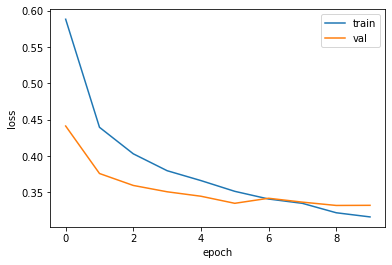

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

조기종료를 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮음

컴퓨터 자원과 시간을 아낄 수 있고, ModelCheckpoint 콜백을 사용하면 최상의 모델을 자동으로 저장해 주므로 편리함

In [66]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.8830


[0.3204330503940582, 0.8830000162124634]